Implementation of coffee roasting in tensorFlow

In [1]:
import tensorflow as tf
print("TF version:", tf.__version__)


TF version: 2.11.0


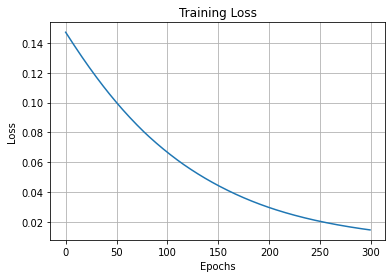

1/1 [==============================] - 0s 250ms/step
Predicted roast time at 170°C: 33.30 minutes


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Coffee roasting data (Temp in °C vs Time in mins)
X = np.array([150, 160, 170, 180, 190, 200], dtype=float)  # Temperature
y = np.array([50, 45, 30, 20, 15, 7], dtype=float)         # Time

# Normalize input and output for better training
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.min()) / (y.max() - y.min())

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[1]),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                 # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_norm, y_norm, epochs=300, verbose=0)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

# Predict roast time for new temperature (e.g., 170°C)
X_new = np.array([170])
X_new_norm = (X_new - X.mean()) / X.std()
y_pred_norm = model.predict(X_new_norm)

# Rescale prediction back to minutes
y_pred = y_pred_norm * (y.max() - y.min()) + y.min()
print(f"Predicted roast time at 170°C: {y_pred[0][0]:.2f} minutes")
